<a href="https://colab.research.google.com/github/Abdulrahman-AlAsali/Deep-Learning/blob/main/Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 4
### Solving a Prediction Regression Problem using DL

Imports

In [1]:
import numpy as np
from keras import models
from keras import layers
from keras.datasets import boston_housing
import matplotlib.pyplot as plt

Building a Model


*   A sequential model
*   2x 64 nodes layers
*   RMSProp optimiser
*   Mean squared error (MSE) risk function
*   Mean Absolute Error (MAE) evaluate metric  


In [2]:
def build_model():
 model = models.Sequential()
 model.add(layers.Dense(64, activation='relu',
 input_shape=(train_data.shape[1],)))
 model.add(layers.Dense(64, activation='relu'))
 model.add(layers.Dense(1))
 model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
 return model

Load the boston housing dataset and split it to (404) traning and (102) test data

In [4]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [25]:
np.ptp(train_data, axis=0)

array([8.896988e+01, 1.000000e+02, 2.728000e+01, 1.000000e+00,
       4.860000e-01, 5.164000e+00, 9.710000e+01, 9.580700e+00,
       2.300000e+01, 5.230000e+02, 9.400000e+00, 3.965800e+02,
       3.624000e+01])

As the data comes with wildly different ranges, we normalise the data


In [26]:
mean = train_data.mean(axis=0)
train_data -= mean
test_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data /= std

#### Due to the small dataset size K-Fold Cross-Validation

*  Splitting data into K folds. we use K = 4.
*  Training K models, each on K-1 folds.
*  Evaluating each model on the remaining fold.
*  Averaging validation scores across all K models.

In [27]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate( [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
  epochs=num_epochs, batch_size=1, verbose=1)
  val_mse, val_mae = model.evaluate(val_data, val_targets)
  all_scores.append(val_mae)

processing fold # 0


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 355.3152 - mae: 16.4165
Epoch 2/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24.3460 - mae: 3.6935
Epoch 3/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 25.9628 - mae: 3.1888
Epoch 4/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 17.3870 - mae: 2.8869
Epoch 5/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 15.6736 - mae: 2.4975
Epoch 6/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.1125 - mae: 2.1891
Epoch 7/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.2550 - mae: 2.3336
Epoch 8/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.5269 - mae: 2.5597
Epoch 9/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.0840 - mae: 2.4405
Epoch 10/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.8957 - mae: 2.3357
Epoch 11/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.2767 - mae: 2.0494
Epoch 12/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.1117 - mae: 2.1730


Check the results of the K-Fold Cross-Validation

In [28]:
all_scores

[2.0873029232025146, 2.550014019012451, 2.86982798576355, 2.551231861114502]

In [29]:
np.mean(all_scores)

2.5145941972732544

Try for 200 epochs and keep history of each epoch

In [30]:
num_epochs = 200
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i *
  num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=1)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

processing fold # 0
Epoch 1/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 384.0263 - mae: 17.1107 - val_loss: 40.3018 - val_mae: 4.0317
Epoch 2/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 45.2574 - mae: 4.5279 - val_loss: 28.5423 - val_mae: 3.1833
Epoch 3/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24.5519 - mae: 3.5281 - val_loss: 21.1384 - val_mae: 2.8648
Epoch 4/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18.6481 - mae: 2.9758 - val_loss: 18.3255 - val_mae: 2.6221
Epoch 5/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.6741 - mae: 2.3651 - val_loss: 16.3737 - val_mae: 2.7210
Epoch 6/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.7049 - mae: 2.5351 - val_loss: 14.0268 - val_mae: 2.4508
Epoch 7/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.6797 - mae: 2.3364 - val_loss: 14.1099 - val_mae: 2.6261
Epoch 8/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12.0111 - mae: 2.3600 - val_loss: 12.4500 - val_mae: 2.2311
Epoch 9/20

Compute the average of the per-epoch MAE scores then plot MAE per Epochs

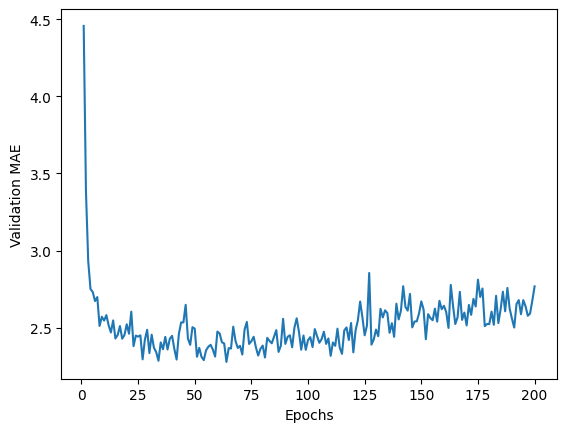

In [33]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
plt.plot(range(1, len(average_mae_history) + 1),
average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

#### Train the model

In [34]:
model = build_model()
model.fit(train_data, train_targets,
epochs=80, batch_size=16, verbose=1)
test_mse_score, test_mae_score = model.evaluate(test_data,
test_targets)
test_mae_score

Epoch 1/80


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 519.3724 - mae: 20.8567   
Epoch 2/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 364.6293 - mae: 16.6848
Epoch 3/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 175.9512 - mae: 10.7293 
Epoch 4/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 81.3136 - mae: 6.5462  
Epoch 5/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41.9464 - mae: 4.6935 
Epoch 6/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27.2227 - mae: 3.8602 
Epoch 7/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.3036 - mae: 3.3268 
Epoch 8/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31.0975 - mae: 3.6039
Epoch 9/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.9805 - mae: 3.0518 
Epoch 10/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.0515 - mae: 2.7151
Epoch 11/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.7576 - mae: 2.7913 
Epoch 12/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.9119 - mae: 2.8191 
Epoch 13/80
26/26 ━━━━━━━━━━━━

2.5786750316619873

k-fold cross-validation and get the loss error for the training and validation sets for visualisation

In [35]:
all_mae_histories = []
all_mae_historiesT = [] # this is for the training curve
for i in range(k):
 print('processing fold #', i)
 val_data = train_data[i * num_val_samples: (i + 1) *
num_val_samples]
 val_targets = train_targets[i * num_val_samples: (i + 1) *
num_val_samples]
 partial_train_data = np.concatenate([train_data[:i *
num_val_samples], train_data[(i + 1) * num_val_samples:]],
axis=0)
 partial_train_targets = np.concatenate([train_targets[:i *
num_val_samples], train_targets[(i + 1) * num_val_samples:]],
axis=0)
 model = build_model()
 history = model.fit(partial_train_data,
partial_train_targets,
 validation_data=(val_data, val_targets), epochs=num_epochs,
batch_size=1, verbose=1)
 mae_history = history.history['val_mae']
 mae_historyT = history.history['loss']
 all_mae_histories.append(mae_history)
 all_mae_historiesT.append(mae_historyT)

processing fold # 0
Epoch 1/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 358.9322 - mae: 16.5164 - val_loss: 32.2305 - val_mae: 3.6187
Epoch 2/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 25.5782 - mae: 3.6389 - val_loss: 19.4834 - val_mae: 2.8286
Epoch 3/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 17.1009 - mae: 2.9818 - val_loss: 15.0491 - val_mae: 2.4916
Epoch 4/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 13.7504 - mae: 2.5684 - val_loss: 13.6813 - val_mae: 2.4088
Epoch 5/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 14.5359 - mae: 2.5979 - val_loss: 13.7330 - val_mae: 2.4081
Epoch 6/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.2135 - mae: 2.4673 - val_loss: 14.9545 - val_mae: 2.7265
Epoch 7/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12.4529 - mae: 2.4136 - val_loss: 13.7610 - val_mae: 2.2535
Epoch 8/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.0840 - mae: 2.3913 - val_loss: 11.8501 - val_mae: 2.2511
Epoch 9/20

Plot the loss

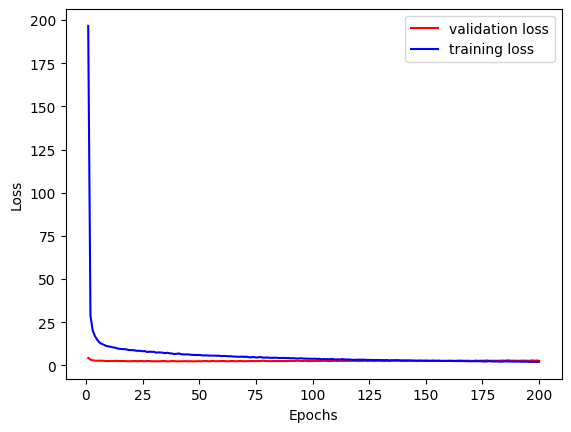

In [36]:
average_mae_history = [np.mean([x[i] for x in
all_mae_histories]) for i in range(num_epochs)]
average_mae_historyT = [np.mean([x[i] for x in
all_mae_historiesT]) for i in range(num_epochs)]
plt.plot(range(1, len(average_mae_history) + 1),
average_mae_history, 'r', label = 'validation loss')
plt.plot(range(1, len(average_mae_historyT) + 1),
average_mae_historyT, 'b', label = 'training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Improvements

Try 3 layers with 128, 64, 32 neurons



In [ ]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(128, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

use `adam` optimizer instead of `rmsprop`


In [ ]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(128, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  return model

use dropout to fix any overfitting issues

In [ ]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(128, activation='relu', input_shape=(train_data.shape[1],)))
  layers.Dropout(0.2)
  model.add(layers.Dense(64, activation='relu'))
  layers.Dropout(0.2)
  model.add(layers.Dense(32, activation='relu'))
  layers.Dropout(0.2)
  model.add(layers.Dense(1))
  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  return model

Try L2 Regularization (kernel_regularizer=keras.regularizers.l2(0.01)).

### Multi-Output Regression Problem


Let's create a synthetic dataset for a multi-output regression, e.g. using make_regression to
create a dataset with 1,000 samples and 10 input features, five of which will be relevant to
the output (n_informative=5) and five of which will be redundant. The dataset will have
three numeric outputs (n_targets=3) for each sample.

In [ ]:
from sklearn.datasets import make_regression
x, y = make_regression(n_samples=1000, n_features=10,
n_informative=5, n_targets=3, random_state=2)
print(x.shape, y.shape)

Simple example of a network architecture to the multi-output regression

In [ ]:
model = Sequential()
model.add(Dense(20, input_dim=10, activation='relu'))
model.add(Dense(3))
model.compile(loss='mae', optimizer='adam')

#### Improvements

Increase Network Depth

Add more layers to better capture complex relationships.
Example:
python
Copy
Edit
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3))  # Output layer remains the same
Batch Normalization

Helps stabilize learning and speeds up convergence:
python
Copy
Edit
from keras.layers import BatchNormalization
model.add(BatchNormalization())
Experiment with Loss Functions

Instead of mae, test Huber Loss, which is robust to outliers:
python
Copy
Edit
model.compile(loss='huber', optimizer='adam')